# Importing Libraries

In [1]:
!pip install emoji

In [2]:
!pip install texthero

In [3]:
!pip install fastapi

In [4]:
!pip install uvicorn

In [5]:
import re
import nltk
import emoji
import pickle
import string
import numpy as np
import pandas as pd
import seaborn as sns
import texthero as hero
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from nltk.tokenize import regexp_tokenize
from sklearn.metrics import precision_score
from sklearn.metrics import  confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing Data

In [7]:
data=pd.read_csv('/content/airline_sentiment_analysis.csv')
data

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...,...
11536,14633,negative,@AmericanAir my flight was Cancelled Flightled...
11537,14634,negative,@AmericanAir right on cue with the delays👌
11538,14635,positive,@AmericanAir thank you we got on a different f...
11539,14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


# Data Preprocessing

# Check For Missing Values

In [8]:
data.isna().sum()

Unnamed: 0           0
airline_sentiment    0
text                 0
dtype: int64

# Categorical Target to Numerical Target

In [9]:
for i in range(0,len(data)):
  if(data['airline_sentiment'][i]=="positive"):
    data['airline_sentiment'][i]=1
  elif(data['airline_sentiment'][i]=="negative"):
    data['airline_sentiment'][i]=-1
  else:
    data['airline_sentiment'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Remove unwanted columns

In [10]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   text               11541 non-null  object
dtypes: object(2)
memory usage: 180.5+ KB


In [12]:
data.describe()

,airline_sentiment,text
count,11541,11541
unique,2,11381
top,-1,@united thanks
freq,9178,5


In [13]:
data

,airline_sentiment,text
0,1,@VirginAmerica plus you've added commercials t...
1,-1,@VirginAmerica it's really aggressive to blast...
2,-1,@VirginAmerica and it's a really big bad thing...
3,-1,@VirginAmerica seriously would pay $30 a fligh...
4,1,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
11536,-1,@AmericanAir my flight was Cancelled Flightled...
11537,-1,@AmericanAir right on cue with the delays👌
11538,1,@AmericanAir thank you we got on a different f...
11539,-1,@AmericanAir leaving over 20 minutes Late Flig...


# Text Preprocessing

# Using text pre processing Class to preprocess data (OOPS)

In [14]:
class text_preprocessing :
  def remove_num(text):
    res = ''.join([i for i in text if not i.isdigit()])
    return res
  
  def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

  def deEmojify(text):
      regrex_pattern = re.compile(pattern = "["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags = re.UNICODE)
      return regrex_pattern.sub(r'',text)

  def lower_text(data):
    data= data.apply(lambda x: x.lower())
    return data

  def stop_remove(data):
    data = hero.remove_stopwords(data)
    return data
  
  def tokenization(text):
    tokens = regexp_tokenize(text, "[\w']+")
    return tokens
  
  def lemmatizer(text):
    #defining the object for Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()  
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
  
  def inverse_lemmatizer(text):
    res=' '.join(text)
    return res

In [15]:
df=pd.DataFrame(data)
df['clean_msg']=df['text'].apply(lambda x:text_preprocessing.remove_num(x))
df['clean_msg']= df['text'].apply(lambda x:text_preprocessing.remove_punctuation(x))
df['clean_msg']=df['clean_msg'].apply(lambda x:text_preprocessing.deEmojify(x))
df['clean_msg']= text_preprocessing.lower_text(df['clean_msg'])
df['clean_msg'] = text_preprocessing.stop_remove(df['clean_msg'])
df['token_msg']= df['clean_msg'].apply(lambda x: text_preprocessing.tokenization(x))
df['token_msg']= df['clean_msg'].apply(lambda x: text_preprocessing.lemmatizer(x))
df['token_msg']= df['clean_msg'].apply(lambda x: text_preprocessing.inverse_lemmatizer(x))
df=df.drop(columns=['token_msg'],axis=1)
df

,airline_sentiment,text,clean_msg
0,1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercials e...
1,-1,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxi...
2,-1,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing
3,-1,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay 30 flight ...
4,1,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx e...
...,...,...,...
11536,-1,@AmericanAir my flight was Cancelled Flightled...,americanair flight cancelled flightled leavi...
11537,-1,@AmericanAir right on cue with the delays👌,americanair right cue delays
11538,1,@AmericanAir thank you we got on a different f...,americanair thank got different flight ch...
11539,-1,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving 20 minutes late flight w...


# Remove Numbers

In [16]:
def remove_num(text):
  res = ''.join([i for i in text if not i.isdigit()])
  return res

In [17]:
data['clean_msg']=data['text'].apply(lambda x:remove_num(x))

# Remove Punctuation

In [18]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text

In [19]:
data['clean_msg']= data['text'].apply(lambda x:remove_punctuation(x))

# Remove Emojis

In [20]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [21]:
data['clean_msg']=data['clean_msg'].apply(lambda x:deEmojify(x))

# Lowering Text

In [22]:
data['clean_msg']= data['clean_msg'].apply(lambda x: x.lower())

#  Stop Word Removal

In [23]:
#applying the function
data['clean_msg'] = hero.remove_stopwords(data['clean_msg'])

# Tokenization

In [24]:
#defining function for tokenization
def tokenization(text):
    tokens = regexp_tokenize(text, "[\w']+")
    return tokens

In [25]:
#applying function to the column
data['token_msg']= data['clean_msg'].apply(lambda x: tokenization(x))

# Lemmitization

In [26]:
#defining the function for lemmatization
def lemmatizer(text):
    #defining the object for Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()  
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [27]:
data['msg_lemmatized']=data['token_msg'].apply(lambda x:lemmatizer(x))

In [28]:
def inverse_lemmatizer(text):
    res=' '.join(text)
    return res

In [29]:
data['clean_msg']=data['msg_lemmatized'].apply(lambda x:inverse_lemmatizer(x))

In [30]:
data=data.drop(columns=['token_msg'],axis=1)

In [31]:
data

,airline_sentiment,text,clean_msg,msg_lemmatized
0,1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercial expe...,"[virginamerica, plus, youve, added, commercial..."
1,-1,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,"[virginamerica, really, aggressive, blast, obn..."
2,-1,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,"[virginamerica, really, big, bad, thing]"
3,-1,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay 30 flight se...,"[virginamerica, seriously, would, pay, 30, fli..."
4,1,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...,"[virginamerica, yes, nearly, every, time, fly,..."
...,...,...,...,...
11536,-1,@AmericanAir my flight was Cancelled Flightled...,americanair flight cancelled flightled leaving...,"[americanair, flight, cancelled, flightled, le..."
11537,-1,@AmericanAir right on cue with the delays👌,americanair right cue delay,"[americanair, right, cue, delay]"
11538,1,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago,"[americanair, thank, got, different, flight, c..."
11539,-1,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving 20 minute late flight warn...,"[americanair, leaving, 20, minute, late, fligh..."


# Split Data into test and train set

In [32]:
ratio=0.6
train = data [ : int(ratio*len(data))]
test = data [int(ratio* len(data)):len(data)]

In [33]:
train

,airline_sentiment,text,clean_msg,msg_lemmatized
0,1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercial expe...,"[virginamerica, plus, youve, added, commercial..."
1,-1,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,"[virginamerica, really, aggressive, blast, obn..."
2,-1,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,"[virginamerica, really, big, bad, thing]"
3,-1,@VirginAmerica seriously would pay $30 a fligh...,virginamerica seriously would pay 30 flight se...,"[virginamerica, seriously, would, pay, 30, fli..."
4,1,"@VirginAmerica yes, nearly every time I fly VX...",virginamerica yes nearly every time fly vx ear...,"[virginamerica, yes, nearly, every, time, fly,..."
...,...,...,...,...
6919,-1,@USAirways Not good. On hold for over an hou...,usairways good hold hour httptcowsgyckciio,"[usairways, good, hold, hour, httptcowsgyckciio]"
6920,1,"@USAirways no worries, your flight attendant t...",usairways worry flight attendant took care,"[usairways, worry, flight, attendant, took, care]"
6921,-1,@USAirways I've been on hold for over an hour....,usairways ive hold hour well customer service ...,"[usairways, ive, hold, hour, well, customer, s..."
6922,-1,@USAirways - 53 minutes on hold for a reservat...,usairways 53 minute hold reservation,"[usairways, 53, minute, hold, reservation]"


In [34]:
test

,airline_sentiment,text,clean_msg,msg_lemmatized
6924,-1,@USAirways #DividendRewards Urgently need to s...,usairways dividendrewards urgently need speak ...,"[usairways, dividendrewards, urgently, need, s..."
6925,-1,@usairways I've been on hold for over an hour ...,usairways ive hold hour bc cc mile arent showi...,"[usairways, ive, hold, hour, bc, cc, mile, are..."
6926,-1,@USAirways I am a premium #DividendMiles #card...,usairways premium dividendmiles cardholder una...,"[usairways, premium, dividendmiles, cardholder..."
6927,-1,@USAirways I bougth ticket same fligths twice ...,usairways bougth ticket fligths twice dont ref...,"[usairways, bougth, ticket, fligths, twice, do..."
6928,-1,@USAirways @AmericanAir now this is beyond rid...,usairways americanair beyond ridiculous steeri...,"[usairways, americanair, beyond, ridiculous, s..."
...,...,...,...,...
11536,-1,@AmericanAir my flight was Cancelled Flightled...,americanair flight cancelled flightled leaving...,"[americanair, flight, cancelled, flightled, le..."
11537,-1,@AmericanAir right on cue with the delays👌,americanair right cue delay,"[americanair, right, cue, delay]"
11538,1,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago,"[americanair, thank, got, different, flight, c..."
11539,-1,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving 20 minute late flight warn...,"[americanair, leaving, 20, minute, late, fligh..."


# TF-IDF 

In [35]:
processed_tweets=[]
for i in range(0, len(data)): 
    processed_tweets.append(data['clean_msg'][i])

tv = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)  
X = tv.fit_transform(processed_tweets).toarray()
y = data['airline_sentiment']
y=y.astype('int')

# Exploratory Data Analysis

# Checking For Imbalanced Data

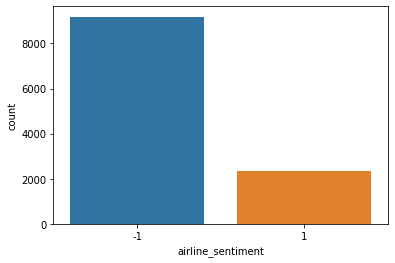

In [36]:
sns.countplot(x=data['airline_sentiment'])

# Using SMOTE algorithm to handle Imbalanced Data

In [37]:
smote = SMOTE()
# fit predictor and target variable
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



# Spliting data in train and test set

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training on Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)

# Model Predictions

In [ ]:
y_pred=model.predict(X_test)

# Model Performance

# Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))  

# Recall

In [ ]:
print(recall_score(y_test, y_pred))

# Precision

In [ ]:
print(precision_score(y_test, y_pred))

## Precision will be the best evaluation metric for airline sentiment analysis because the airline is more concerned about the 'negative' class and the more number of 'False Positives' will be a problem for the airline. So the model should minimize the number of false positives.As precision = TP/(TP+FP)
  

## The less number of false positives means the precision is higher that means the model is doing great.

# F1- Score

In [ ]:
print(f1_score(y_test, y_pred))

# ROC-AUC Curve

In [ ]:
metrics.plot_roc_curve(model, X_test, y_test)  

# Visualization

In [ ]:
all_words = ' '.join([text for text in data['clean_msg']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Saving Model

In [ ]:
### Create a Pickle file using serialization 
pickle_out = open("model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()